# Stochastic 3 Heatmap
#### To be used in conjunction with Stochastic 3
Aaron Smith 2024/25.   


#### Overview:
Stochastic 3 creates a Sim file, summarising the results of the run. This program takes in a directory full of such files, converts them to array-like (actually multidimensional list), and is then able to generate plots and heatmaps. This is version 3 of the program, designed to be more flexible with the naming structure of input files.

#### Outdata File Format:

Sim {name} {ex_val_1} {ex_val_2} {ex_val_3} ...

^Essentially we have a handle which will be trimmed off immediately, and then all the important numbers and details seperated by underscores.

File itself is csv, to be read as pandas dataframe

## Data Table Construction

In [1]:
## IMPORT STATEMENTS ##

import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import itertools as itl
import copy
import ast

col0 = "#FF595E"
col1 = "#FF924C"
col2 = "#FFCA3A"
col3 = "#8AC926"
col4 = "#1982C4"
col5 = "#6A4C93"
col6 = "#363636"
col7 = "#eeeeee"
col8 = "#606060"

In [2]:
## SET WORKING DIRECTORY ##

CSD3_1 = "C:\\Users\\aaron\\Jupyter Labs Code\\PhD 3a. Stochastic 3\\CSD3 Runs\\"
CSD3_2 = "C:\\Users\\aaron\\Jupyter Labs Code\\PhD 3a. Stochastic 3\\CSD3 Runs II\\"

directory = CSD3_2
dataset = "MeansNormalNarrow"

WkDir = directory + dataset

try:
    os.chdir(WkDir)
    files = os.listdir(WkDir)
    print("Hello and welcome! The dataset {} contains {} files. The first and last are:".format(dataset, len(files)))
    print("  ", files[0])
    print("  ", files[-1])

except:
    print("Oops. name {} doesn't match anything in {}!".format(dataset, directory))

files = [file for file in files if os.fsdecode(file).startswith("Sim")]

Hello and welcome! The dataset MeansNormalNarrow contains 8832 files. The first and last are:
   MeansNormalNarrowblurred.png
   Sim_S332_9.0_1_600_30.0_0.01_30.0_0.01.csv


In [3]:
## FILENAME COMPREHENSION ##

# Where in the filenames, do ext_val_1, 2 and 3 appear? (How many _s before the value?)
# 5,7,2 for CSD3 II (Means) or 8,7,2 (Bottle / Wave)
pos1 = 5
pos2 = 7
pos3 = 2

filename = os.fsdecode(files[0])
print("The first filename contains the values:")
for i, val in enumerate(filename.split("_")):
    print("  ", i, val)
print("Okay, the important values in the first filename are:")
print("  ", filename.split("_")[pos1])
print("  ", filename.split("_")[pos2])
print("  ", filename.split("_")[pos3])

print()
print("Don't worry if one has .csv stuck on at the moment, we'll trim that later!")


The first filename contains the values:
   0 Sim
   1 S332
   2 1.0
   3 1
   4 600
   5 10.0
   6 0.01
   7 10.0
   8 0.01.csv
Okay, the important values in the first filename are:
   10.0
   10.0
   1.0

Don't worry if one has .csv stuck on at the moment, we'll trim that later!


In [4]:
# Drop anything which isn't a Sim file, e.g. environments, python scripts etc.
files = [file for file in files if os.fsdecode(file).startswith("Sim")]

for i, file in enumerate(files):
    filename = os.fsdecode(file)
    
    # Append ".csv" if necessary
    if not filename.endswith(".csv"):
        os.rename(filename, filename + ".csv")

In [5]:
## LOOP OVER ALL .csv FILES ##


# Drop anything which isn't a Sim file, e.g. environments, python scripts etc.
files = os.listdir(WkDir)
files = [file for file in files if os.fsdecode(file).startswith("Sim")]

for i, file in enumerate(files): 
    filename = os.fsdecode(file)

    # Read as a pandas DF
    df0 = pd.read_csv(file)

    if filename.endswith(".csv"):
        filename = filename[:-4]

    # Read external values
    ev1 = filename.split("_")[pos1]
    ev2 = filename.split("_")[pos2]
    ev3 = filename.split("_")[pos3]#[:-4]  # -4 to trim .csv back off the end

    dictionary = {"ev1" : [ev1],
                  "ev2" : [ev2],
                  "ev3" : [ev3]}

    # Combine the data and external values into one big DataFrame
    df1 = pd.DataFrame(dictionary)
    df = pd.concat([df0, df1], axis=1, ignore_index=False)
    
    # Append this to all the previous DataFrames
    if i == 0:
        DF = df
    else:
        DF = pd.concat([DF, df], axis=0, ignore_index=True)
    
    print("Reading files! {} of {}.        ".format(i, len(files)), end = "\r")


DF

Reading files! 8819 of 8820.        

,Unnamed: 0,winners,end times,ratios,wavespeeds,bottlenecks,delta_Fs,delta_Fs_CI,growth rates (no ads),growth rates (ads),ev1,ev2,ev3
0,0,Phage Mu,600.00,1.071429,[],30,-0.000302,-0.000321,"[0.48179174896177723, 0.5221372526788519]","[0.486020857365556, 0.47119524078965597]",10.0,10.0,1.0
1,0,Phage Wt,50.59,0.000000,[],3,-0.015737,-0.056898,"[0.5234998632332601, 0.4484188177003325]","[0.46235768341166333, 0.380429242395425]",10.0,11.0,1.0
2,0,Phage Wt,50.56,0.000000,[],3,-0.017193,-0.058589,"[0.5275212197663338, 0.4696465607435086]","[0.4668925394260829, 0.3852151745990667]",10.0,12.0,1.0
3,0,Phage Wt,50.52,0.000000,[],3,-0.015972,-0.056443,"[0.516460759997874, 0.4054012861454809]","[0.5108730440397274, 0.3596494099719713]",10.0,13.0,1.0
4,0,Phage Wt,50.57,0.000000,[],3,-0.012845,-0.057043,"[0.47787634367731685, 0.35122785966116554]","[0.4882615312178395, 0.36436730834444053]",10.0,14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,0,Phage Mu,78.17,4.194814,[],2,0.018343,0.016793,"[0.16706628803055262, 0.1910287535602166]","[0.1576883826167687, 0.19735883191533807]",30.0,26.0,9.0
8816,0,Phage Mu,81.17,3.431687,[],2,0.015191,0.016424,"[0.1639968555555653, 0.15780755779283026]","[0.17228360795187928, 0.14523788152326386]",30.0,27.0,9.0
8817,0,Phage Mu,84.18,4.515686,[],2,0.017909,0.016432,"[0.16362842649362525, 0.1665788717006799]","[0.16020447376780894, 0.17335838005623166]",30.0,28.0,9.0
8818,0,Phage Mu,87.17,7.101012,[],2,0.022488,0.016781,"[0.16438499885039942, 0.182500557694362]","[0.1702667855642875, 0.17768129030636967]",30.0,29.0,9.0


In [6]:
## Unpack Axes ##

x_axis = []
y_axis = []

for i in range(len(files)):
    x = float(DF.at[i, "ev1"])
    y = float(DF.at[i, "ev2"])

    if x not in x_axis:
        x_axis = x_axis + [x]

    if y not in y_axis:
        y_axis = y_axis + [y]

x_axis = sorted(x_axis)
y_axis = sorted(y_axis)

X = len(x_axis)
Y = len(y_axis)

print(x_axis)
print(y_axis)

[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]


In [7]:
Nr = len(files) / (X*Y)
Nr

if Nr % 1 != 0:
    print("Warning, some files seem to be missing!")

In [8]:
## Check Deceptive Columns ##
# Sometimes a column can appear empty, when in actuality it is empty at the top and bottom but has values in the middle
print("Number of Unique Values in:")
for col in DF.columns:
    print(col, ":    ", len(DF[col].unique()))

Number of Unique Values in:
Unnamed: 0 :     1
winners :     2
end times :     1544
ratios :     4152
wavespeeds :     1
bottlenecks :     24
delta_Fs :     8820
delta_Fs_CI :     8806
growth rates (no ads) :     8820
growth rates (ads) :     8820
ev1 :     21
ev2 :     21
ev3 :     20


In [9]:
## Axis Titles ##

title_1 = "Mutant Lysis Time Mean (min)"
title_2 = "Wild Type Lysis Time Mean (min)."

In [10]:
# View specifics

# a = DF.loc[DF["ev1"] == "24.0"]
# b = a.loc[a["ev2"] == "27.0"]
# b

## Analysis and Plotting

In [11]:
## Colours and Cmaps ##

# colours
green = "#6dc317"
yellow = "#e8c636"
orange = "#ed7d31"
red = "#d93a15"
purple = "#8c43ed"
blue = "#177add"
black = "#000000"
charcoal = "#2f2f2f"
grey = "#c2c2c2"
white = "#ffffff"
off_white = "#fafafa"

# basic
spectral = mpl.cm.Spectral
viridis = mpl.cm.viridis

# spectral but with saturated values
cmap = mpl.pyplot.get_cmap("Spectral")
low = [0.439216, 0.003922, 0.25098, 1]    # RGBA
high = [0.337255, 0.180392, 0.611765, 1]   # RGBA

cmap = cmap(np.arange(cmap.N))
cmap = np.vstack((low, cmap, high))
spectral2 = mpl.colors.ListedColormap(cmap)

In [12]:
## Ok side project, we need a colourmap which effectively distinguishes values between 3.6 and 4, as well as 4 to 11.
# Define every 0.1 from 3.6 to 11 inclusive (so 75 defined colours: col1, then 3 intermediates, then col2, then 69 intermediates, then col3)
# Start with an exisiting mapping, find the half-way point.
col1 = np.array([102/255, 0, 204/255])
col2 = np.array([0/255, 204/255, 205/255])
col3 = np.array([1, 1, 0])

def interpolate(start, end, N, trim = 0): # Takes in start and end coordinates and interpolates N intermiedate values.
    start, end, N = np.array(start), np.array(end), int(N)
    difference = end - start
    delta = difference / (N+1)
    A = np.zeros([N+2, len(start)])
    A[0,:] = start
    A[-1,:] = end
    for i in range(1, N+1):
        A[i,:] = start + i*delta

    if trim > 0:
        A = A[0:-trim]
    return(A)

print(interpolate([0, 0, 0], [1, 2, 4], 4, trim = 0))    # test

stack1 = interpolate(col1, col2, 3*256, trim = 1)
stack2 = interpolate(col2, col3, 69*256, trim = 0)

col_stack = np.vstack([stack1, stack2])
cmap_enhance = mpl.colors.ListedColormap(col_stack)

## Not terrible, but we can do better ##.
## Loses contrast on linear ##

[[0.  0.  0. ]
 [0.2 0.4 0.8]
 [0.4 0.8 1.6]
 [0.6 1.2 2.4]
 [0.8 1.6 3.2]
 [1.  2.  4. ]]


In [13]:
# enhance_2 - anchor at 3.6, (3) 4.0, (19) 6.0, (49) 11.0.

col1 = np.array([0, 102/255, 1])
col2 = np.array([1, 0, 1])
col3 = np.array([1, 153/255, 0])
col4 = np.array([1, 1, 0])

stack1 = interpolate(col1, col2, 3*256, trim = 1)
stack2 = interpolate(col2, col3, 19*256, trim = 1)
stack3 = interpolate(col3, col4, 49*256, trim = 0)

col_stack = np.vstack([stack1, stack2, stack3])
cmap_enhance_2 = mpl.colors.ListedColormap(col_stack)

In [14]:
# enhance_3 - Same as 2, but blue darker, all colours desaturated.

col1 = np.array([21, 37, 193])/255
col2 = np.array([228, 32, 223])/255
col3 = np.array([229, 142, 27])/255
col4 = np.array([233, 223, 23])/255

stack1 = interpolate(col1, col2, 3*256, trim = 1)
stack2 = interpolate(col2, col3, 19*256, trim = 1)
stack3 = interpolate(col3, col4, 49*256, trim = 0)

col_stack = np.vstack([stack1, stack2, stack3])
cmap_enhance_3 = mpl.colors.ListedColormap(col_stack)

In [15]:
# enhance_magma - start with mpl.cm.magma and rescale, rather than defining from scratch
# 4 points: 3.6 (9) 3.7 (29) 4.0 (199) 6.0 (499) 11.0

cmap = mpl.pyplot.get_cmap("magma")
cmap = cmap(np.arange(cmap.N))  # Extract the colors (256)
cmap = cmap.tolist()   # Convert to list of lists

print(len(cmap))

col1 = cmap[0]
col2 = cmap[63]
col3 = cmap[127]
col4 = cmap[191]
col5 = cmap[255]

stack1 = interpolate(col1, col2, 9, trim = 1)
stack2 = interpolate(col2, col3, 29, trim = 1)
stack3 = interpolate(col3, col4, 199, trim = 1)
stack4 = interpolate(col4, col5, 499, trim = 0)

col_stack = np.vstack([stack1, stack2, stack3, stack4])
cmap_enhance_magma = mpl.colors.ListedColormap(col_stack)

256


In [16]:
## Colourmap using blue and pink - for contrasting metrics w/o implying mutant or wt wins ##
darker_blue = "#2ab2b2"
lighter_blue = "#6ddfdd"
whiteish = "#f0f0f0"
lighter_pink = "#de6ac5"
darker_pink = "#c718ad"
cmap_bluepink = mpl.colors.ListedColormap([darker_blue, lighter_blue, whiteish, lighter_pink, darker_pink])

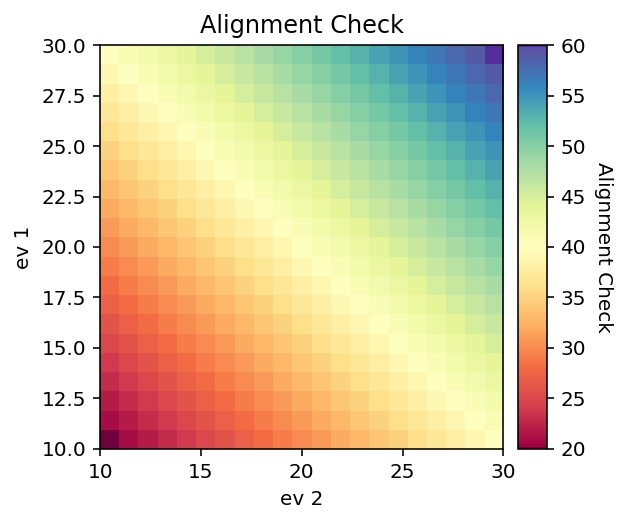

<Figure size 640x480 with 0 Axes>

In [17]:
## Alignment Check ##

image = np.zeros([Y, X])

for i in range(len(files)):
    x = x_axis.index(float(DF.at[i, "ev1"]))
    y = y_axis.index(float(DF.at[i, "ev2"]))

    image[y,x] += (x_axis[x] + y_axis[y])

image = image / Nr



fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im = ax.imshow(image, cmap = spectral2,
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Alignment Check", rotation=-90, va="bottom")

ax.set_xlabel("ev 2")
ax.set_ylabel("ev 1")
ax.set_title("Alignment Check")


plt.show()
plt.clf()


In [18]:
## Actual Plots ##
MAGIC_NUMBER = 7/3    # default 7/3 for bottle, wave
Delta_F_Max = 0.05    # 0.05 for wave, 0.1 for bottle, 0.05 for bottle (low adsoprtion)

print("Delta F scale will saturate at {}.".format(Delta_F_Max))

Delta F scale will saturate at 0.05.


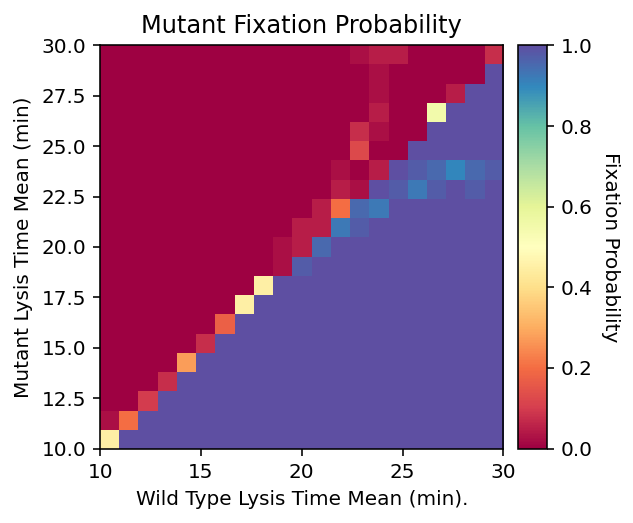

<Figure size 640x480 with 0 Axes>

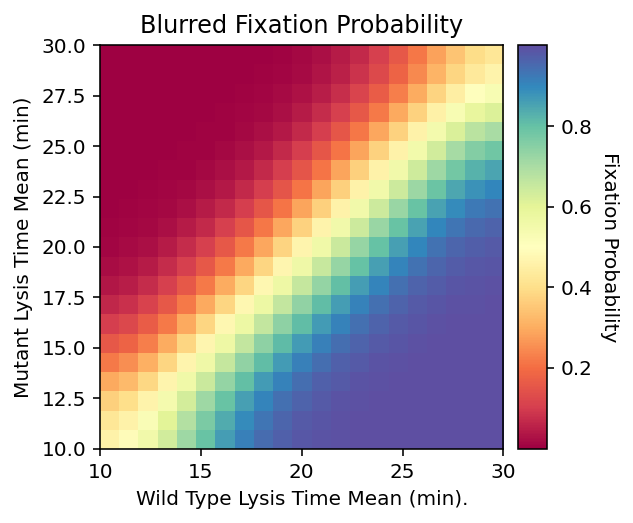

<Figure size 640x480 with 0 Axes>

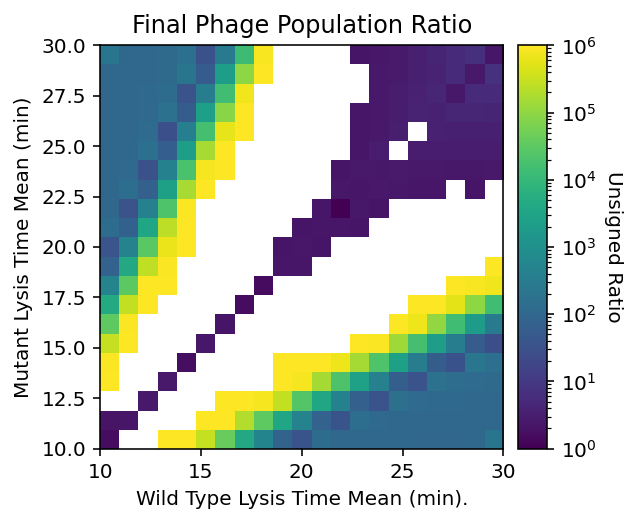

<Figure size 640x480 with 0 Axes>

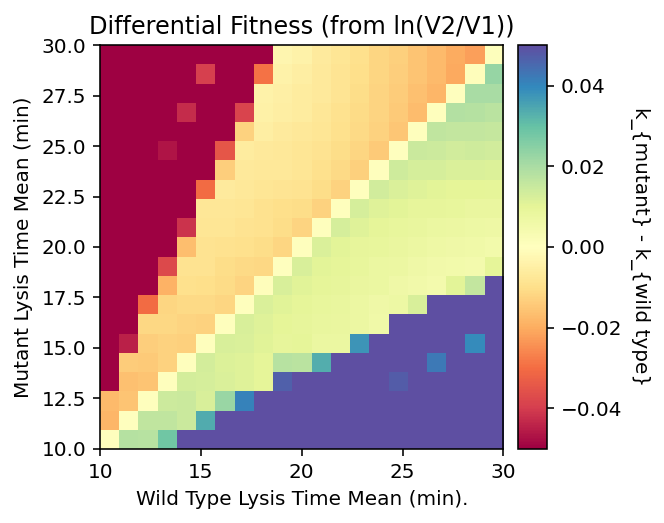

<Figure size 640x480 with 0 Axes>

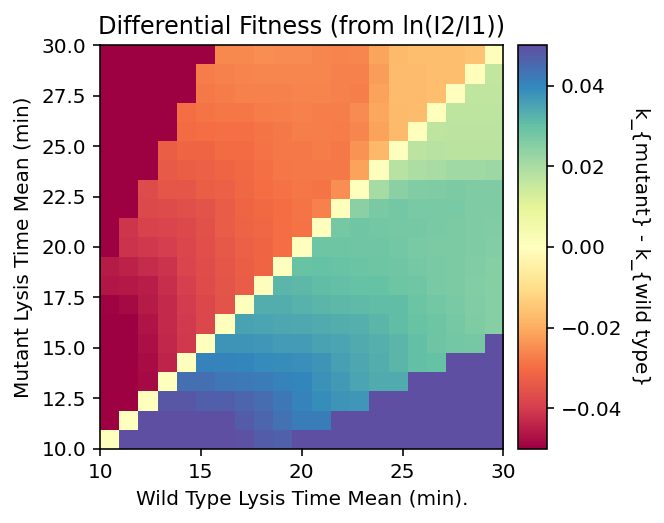

<Figure size 640x480 with 0 Axes>

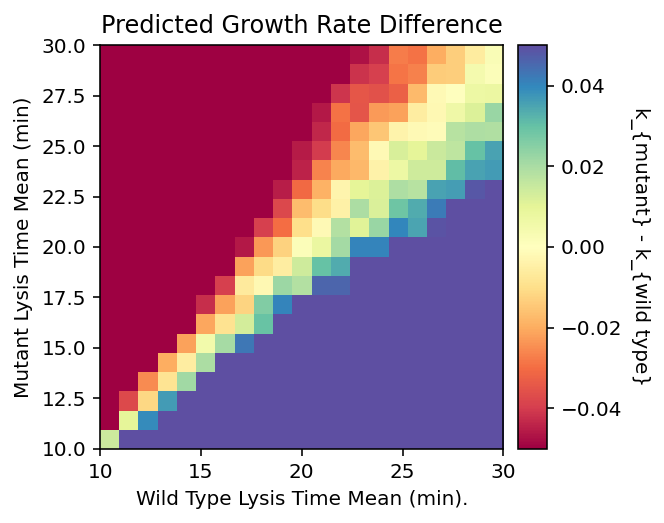

<Figure size 640x480 with 0 Axes>

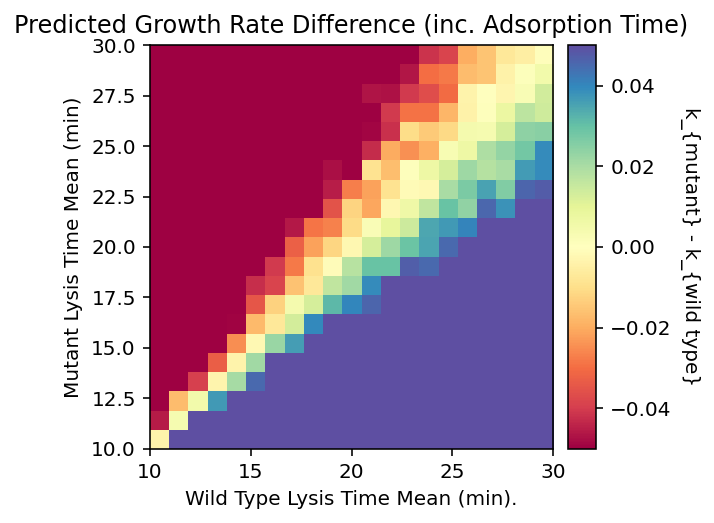

<Figure size 640x480 with 0 Axes>

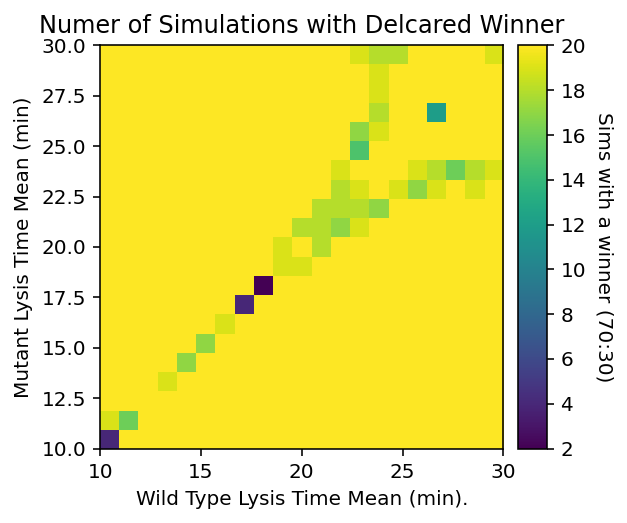

<Figure size 640x480 with 0 Axes>

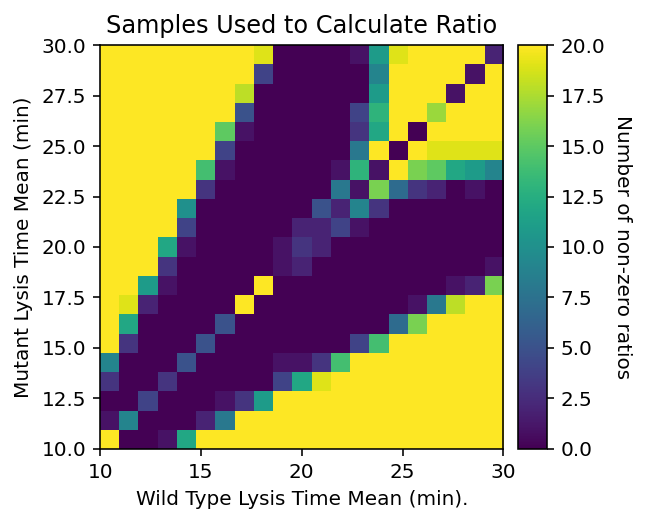

<Figure size 640x480 with 0 Axes>

In [19]:
# Images to plot
im_winner = np.zeros([Y, X])        # Fixation probability
winner_declared = np.zeros([Y, X])  # ^ in which sims was a winner declared?
sim_completed = np.zeros([Y, X])    # Number of sims which completed (useful if we have say 8817 of 8820 complete)

im_ratio = np.ones([Y, X])         # Ratio more numerous phage : less numerous, alternatively = 0 if one species extinct
valid_ratios = np.zeros([Y, X])     # ^ in which sims is this non zero

im_delta_F = np.zeros([Y, X])       # Differntial Fitness delta F, for bottleneck sims only
valid_deltas = np.zeros([Y, X])     # ^ in whuch sims were there at least 2 bottlenecks, hence this value could be calculated
delta_F_scale = 0

im_delta_F_CI = np.zeros([Y, X])       # Differntial Fitness delta F from cumulative infections, for bottleneck sims only
valid_deltas_CI = np.zeros([Y, X]) 
delta_F_CI_scale = 0

im_wavespeed = np.zeros([Y, X])     # Wavespeed of more numerous phage
im_gr = np.zeros([Y, X])            # Difference in predicted growth rate (No ads)
gr_scale = 0
im_gr_ads = np.zeros([Y, X])            # Difference in predicted growth rate (correcting for adsorption)
gr_ads_scale = 0


# Calculate values
for i in range(len(files)):
    x = x_axis.index(float(DF.at[i, "ev1"]))
    y = y_axis.index(float(DF.at[i, "ev2"]))

    # Ratio (here we take a GEOMETRIC MEAN)
    ratio = DF.at[i, "ratios"]
    if ratio > 0:
        im_ratio[y, x] =  im_ratio[y, x] * ratio
        valid_ratios[y, x] += 1
    
    # Winner
    winner = DF.at[i, "winners"]
    if winner == "Phage Wt" and (ratio > MAGIC_NUMBER or ratio == 0): # remember that ratio always exceedes 1, except == 0 meaning one phage has gone extinct!
        im_winner[y, x] += 0
        winner_declared[y, x] += 1
        sim_completed[y,x] += 1
    elif winner == "Phage Mu" and (ratio > MAGIC_NUMBER or ratio == 0):
        im_winner[y, x] += 1
        winner_declared[y, x] += 1
        sim_completed[y,x] += 1
    else:
        im_winner[y, x] += 0.5
        sim_completed[y,x] += 1

    # Delta Fs
    delta_F = DF.at[i, "delta_Fs"]
    if delta_F != "[]":
        valid_deltas[y, x] += 1
        im_delta_F[y, x] += delta_F

    # Delta Fs (CI)
    delta_F_CI = DF.at[i, "delta_Fs_CI"]
    if delta_F_CI != "[]":
        valid_deltas_CI[y, x] += 1
        im_delta_F_CI[y, x] += delta_F_CI

    # Wavespeed (of the more numerous phage)
    if DF.at[i, "wavespeeds"] != "[]":
        float_list = eval(DF.at[i, "wavespeeds"])
        
        if winner == "Phage Wt":
            wavespeed = float_list[0]
        elif winner == "Phage Mu":
            wavespeed = float_list[1]
        else:
            throw_an_error
        im_wavespeed[y,x] += wavespeed

    # Predicted Growth Rates
    grs = DF.at[i, "growth rates (no ads)"]
    grs = ast.literal_eval(grs)
    delta_gr = grs[1] - grs[0]
    im_gr[y, x] += delta_gr
    if abs(delta_gr) > gr_scale:
        gr_scale = abs(delta_gr)

    grs = DF.at[i, "growth rates (ads)"]
    grs = ast.literal_eval(grs)
    delta_gr = grs[1] - grs[0]
    im_gr_ads[y, x] += delta_gr
    if abs(delta_gr) > gr_ads_scale:
        gr_ads_scale = abs(delta_gr)

    

# And average
im_winner = im_winner / sim_completed

for y,x in itl.product(range(Y), range(X)):
    if valid_ratios[y, x] > 0:
        im_ratio[y,x] = im_ratio[y,x] ** (1 /  valid_ratios[y,x])
    else:
        im_ratio[y,x] = np.nan

if np.any(im_delta_F):
    for y,x in itl.product(range(Y), range(X)):
        if valid_deltas[y, x] > 0:
            im_delta_F[y,x] = im_delta_F[y,x] / valid_deltas[y,x]
            if abs(im_delta_F[y,x]) > delta_F_scale:
                delta_F_scale = abs(im_delta_F[y,x])
        else:
            if im_winner[y,x] > 0.5:
                im_delta_F[y,x] = 1000    # differnce too larg to sample (+ve)
            else:
                im_delta_F[y,x] = -1000   # differnce too larg to sample (-ve)

if np.any(im_delta_F_CI):
    for y,x in itl.product(range(Y), range(X)):
        if valid_deltas_CI[y, x] > 0:
            im_delta_F_CI[y,x] = im_delta_F_CI[y,x] / valid_deltas_CI[y,x]
            if abs(im_delta_F_CI[y,x]) > delta_F_CI_scale:
                delta_F_CI_scale = abs(im_delta_F_CI[y,x])
        else:
            if im_winner[y,x] > 0.5:
                im_delta_F_CI[y,x] = 1000    # differnce too larg to sample (+ve)
            else:
                im_delta_F_CI[y,x] = -1000   # differnce too larg to sample (-ve)

im_wavespeed = im_wavespeed / Nr
im_gr = im_gr / Nr
im_gr_ads = im_gr_ads / Nr
    
###################################################################################################

# Plot (winner)
fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im = ax.imshow(im_winner, cmap = spectral, norm = "linear", vmin = 0, vmax = 1,
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Fixation Probability", rotation=-90, va="bottom")

ax.set_xlabel(title_2)
ax.set_ylabel(title_1)
ax.set_title("Mutant Fixation Probability")

plt.savefig(dataset + "winner.svg")
plt.savefig(dataset + "winner.png")
np.save(dataset + "winner.npy", im_winner)
plt.show()
plt.clf()



# Plot (winner - blurred)
fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im_blurred = sp.ndimage.gaussian_filter(im_winner, sigma = 3.0)
im = ax.imshow(im_blurred, cmap = spectral, norm = "linear", # vmin = 0.1, vmax = 0.9,
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Fixation Probability", rotation=-90, va="bottom")

ax.set_xlabel(title_2)
ax.set_ylabel(title_1)
ax.set_title("Blurred Fixation Probability")

plt.savefig(dataset + "blurred.svg")
plt.savefig(dataset + "blurred.png")
np.save(dataset + "blurred.npy", im_blurred)
plt.show()
plt.clf()



# Plot (ratio)
fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im = ax.imshow(im_ratio, cmap = viridis, norm = "log", vmin = 1, vmax = 10**6,
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Unsigned Ratio", rotation=-90, va="bottom")

ax.set_xlabel(title_2)
ax.set_ylabel(title_1)
ax.set_title("Final Phage Population Ratio")

plt.savefig(dataset + "ratio.svg")
plt.savefig(dataset + "ratio.png")
np.save(dataset + "ratio.npy", im_ratio)
plt.show()
plt.clf()



# Plot (delta F)
if np.any(im_delta_F):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_delta_F, cmap = spectral, norm = "linear", vmin = -1*Delta_F_Max, vmax = Delta_F_Max, #-1.01 * delta_F_scale, vmax = 1.01*delta_F_scale,
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("k_{mutant} - k_{wild type}", rotation=-90, va="bottom")
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Differential Fitness (from ln(V2/V1))")

    plt.savefig(dataset + "delta F.svg")
    plt.savefig(dataset + "delta F.png")
    np.save(dataset + "delta F.npy", im_delta_F)
    plt.show()
    plt.clf()


# Plot (delta F CI)
if np.any(im_delta_F):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_delta_F_CI, cmap = spectral, norm = "linear", vmin = -1*Delta_F_Max, vmax = Delta_F_Max, # vmin = -1.01 * delta_F_CI_scale, vmax = 1.01*delta_F_CI_scale,
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("k_{mutant} - k_{wild type}", rotation=-90, va="bottom")
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Differential Fitness (from ln(I2/I1))")

    plt.savefig(dataset + "delta F CI.svg")
    plt.savefig(dataset + "delta F CI.png")
    np.save(dataset + "delta F CI.npy", im_delta_F_CI)
    plt.show()
    plt.clf()


# Plot (delta predicted delta k)
if np.any(im_gr):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_gr, cmap = spectral, norm = "linear", vmin = -1*Delta_F_Max, vmax = Delta_F_Max, #-1.01*gr_scale, vmax = 1.01*gr_scale,
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("k_{mutant} - k_{wild type}", rotation=-90, va="bottom")
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Predicted Growth Rate Difference")

    plt.savefig(dataset + "delta k.svg")
    plt.savefig(dataset + "delta k.png")
    np.save(dataset + "delta k.npy", im_gr)
    plt.show()
    plt.clf()


# Plot (delta predicted delta k)
if np.any(im_gr_ads):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_gr_ads, cmap = spectral, norm = "linear", vmin = -1*Delta_F_Max, vmax = Delta_F_Max, #-1.01*gr_scale, vmax = 1.01*gr_scale,
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("k_{mutant} - k_{wild type}", rotation=-90, va="bottom")
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Predicted Growth Rate Difference (inc. Adsorption Time)")

    plt.savefig(dataset + "delta k ads.svg")
    plt.savefig(dataset + "delta k ads.png")
    np.save(dataset + "delta k ads.npy", im_gr)
    plt.show()
    plt.clf()



# Plot (wavespeeds)
if np.any(im_wavespeed):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_wavespeed, cmap = mpl.cm.magma, norm = "linear",
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("Wavespeed (um per min)", rotation=-90, va="bottom")
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Wavespeeds")

    plt.savefig(dataset + "wavespeed.svg")
    plt.savefig(dataset + "wavespeed.png")
    np.save(dataset + "wavespeed.npy", im_wavespeed)
    plt.show()
    plt.clf()

# Plot (wavespeeds, enhanced)
if np.any(im_wavespeed):
    fig = plt.figure(figsize=(4,4), dpi = 144)
    ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
    cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
    im = ax.imshow(im_wavespeed, cmap = cmap_enhance_magma, norm = "linear", vmin = 3.6, vmax = 11,
                   aspect = "auto", origin = "lower", interpolation = "none",
                   extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])
    
    cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
    cbar.outline.set_visible(True)
    cbar.ax.set_ylabel("Wavespeed (um per min)", rotation=-90, va="bottom")
    cbar.set_ticks([3.6, 4.0, 6.0, 8.0, 10.0, 11.0])
    
    ax.set_xlabel(title_2)
    ax.set_ylabel(title_1)
    ax.set_title("Wavespeeds")

    plt.savefig(dataset + "wavespeed_2.svg")
    plt.savefig(dataset + "wavespeed_2.png")
    plt.show()
    plt.clf()



# Plot (number of sims in which a winner was declared)
fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im = ax.imshow(winner_declared, cmap = viridis, norm = "linear",
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Sims with a winner (70:30)", rotation=-90, va="bottom")

ax.set_xlabel(title_2)
ax.set_ylabel(title_1)
ax.set_title("Numer of Simulations with Delcared Winner")

plt.show()
plt.clf()



# Plot (number of valid ratios)
fig = plt.figure(figsize=(4,4), dpi = 144)
ax = fig.add_axes([0.1, 0.1, 0.7, 0.7])
cax = fig.add_axes([0.825, 0.1, 0.05, 0.7])
im = ax.imshow(valid_ratios, cmap = viridis, norm = "linear",
               aspect = "auto", origin = "lower", interpolation = "none",
               extent = [min(x_axis), max(x_axis), min(y_axis), max(y_axis)])

cbar = ax.figure.colorbar(im, cax = cax) #ticks = [0,10,20,30,40,50,60,70,80,90,100])
cbar.outline.set_visible(True)
cbar.ax.set_ylabel("Number of non-zero ratios", rotation=-90, va="bottom")

ax.set_xlabel(title_2)
ax.set_ylabel(title_1)
ax.set_title("Samples Used to Calculate Ratio")

plt.show()
plt.clf()



